# <center> Miscellaneous </center>

klik untuk [Open in colab](https://colab.research.google.com/github/ferdinand-winstein/py-dts/blob/master/PE2%20Module%204%20-%20Miscellaneous.ipynb) 

# Materi Modul

- Generators, iterators and closures
- Working with file-system, directory tree and files
- Selected Python Standard Library modules (os, datetime, time, and calendar.)



# Generators, Iterators, Closures
- Generator : suatu kode yang mampu menghasilkan serangkaian nilai untuk mengontrol proses iterasi 
- Iterator : cara di mana suatu objek harus berperilaku agar sesuai dengan aturan yang diberlakukan oleh konteks pernyataan `for` dan `in` (seringkali disamaartikan dengan generator, namun dalam konteks lebih sempit)
- closures : membuat fungsi dari fungsi dengan beberapa nilai tersimpan dalam fungsi baru

## Generator & Iterator

Contoh generator yang sudah sering kita temui adalah `range` 

In [ ]:
print(range(5))
print(type(range(5)))
print(list(range(5)))

### Membuat `range` kita sendiri

membuat `range` kita sendiri dengan fungsi (bukan generator)

In [ ]:
def rentangfun(n):
    lst = []
    i = 0
    while i < n:
        lst.append(i)
        i +=1
    return lst

print(rentangfun(5))
print(type(rentangfun(5)))

Membuat `range` kita sendiri dengan generator berbasis obyek

In [ ]:
class jangkauan:
    def __init__(self,start, stop = 'stop_only', step = 1):
        if stop == 'stop_only':
            self.__n = start # limit / batas
            self.__i = 0 # dimulai dari 0 sampai batas
        else:
            self.__n = stop # limit / batas
            self.__i = start # dimulai dari 0 sampai batas
        self.__step = step
            
    def __iter__(self): #agar dia melakukan looping / iterasi sampai bertemu StopIteration 
        return self
    
    def __next__(self):
        self.__i += self.__step
        if self.__i > self.__n:
            raise StopIteration # digunakan untuk menghentikan proses iterasi   
        return self.__i - self.__step

    def __str__(self):
        return 'jangkauan('+str(self.__i)+','+str(self.__n)+')'

print(list(jangkauan(5)))
print(list(jangkauan(1,5)))
print(list(jangkauan(1,5,2)))

In [ ]:
class rentang:
    def __init__(self,n):
        self.n = n
        self.i = 0
    def __iter__(self):
        return self
    def __next__(self):
        self.i += 1
        if self.i > self.n:
            raise StopIteration
        return self.i - 1
    
print(rentang(5))
print(type(rentang(5))) 
print(list(rentang(5)))

In [ ]:
class prime:
    def __init__(self,n):
        self.n = n # limit
        self.counter = 0 # iterator
        self.prime = 1 # nilai prima yg akan di return
    def __iter__(self):
        return self
    
    def __next__(self):
        #program utk cek self.prime itu prima atau tidak
        cek = False
        while cek == False and self.prime != 1:
            cek = True
            for i in range(2,self.prime):
                if self.prime % i == 0:
                    cek = False
            self.prime += 1
        
        if self.prime == 1:
            self.prime += 1
            return 1
        if self.counter >= self.n-1:
            raise StopIteration
        self.counter += 1
        return self.prime - 1
    
for i in prime(100):
    print(i)

Contoh : Membuat generator untuk deret bilangan fibbonaci

In [ ]:
class Fib:
    def __init__(self, nn):
        self.__n = nn
        self.__i = 0
        self.__p1 = self.__p2 = 1

    def __iter__(self):
        print("Fib iter")
        return self

    def __next__(self):
        self.__i += 1
        if self.__i > self.__n:         
            raise StopIteration
        if self.__i in [1, 2]:
            return 1
        ret = self.__p1 + self.__p2
        self.__p1, self.__p2 = self.__p2, ret
        return ret

In [ ]:
for i in Fib(100):
    print(i)

### `yield` Statement

Penggunaan `yield` menggantikan return pada function mengubah function menjadi generator 

In [ ]:
def rentangyield(n):
    i = 0
    while i < n:
        i += 1
        yield i-1

print(rentangyield(5))
print(type(rentangyield(5)))
print(list(rentangyield(5)))

In [ ]:
def fun(n):
    for i in range(n):
        yield i
        
for i in fun(5):
    print(i)

In [ ]:
def prime(n):
    i = 1
    counter = 0
    while counter < n:
        if i == 1:
            yield 1
            i += 1
        else:
            cek = False
            while cek == False:
                cek = True
                for j in range(2,i):
                    if i % j == 0:
                        cek = False
                i += 1
            yield i - 1
        counter += 1
    
print(list(prime(10)))

### The Fibonacci number generator

In [ ]:
def fibonacci(n):
    p = pp = 1
    for i in range(n):
        if i in [0, 1]:
            yield 1
        else:
            n = p + pp
            pp, p = p, n
            yield n

fibs = list(fibonacci(10))
print(fibs)

### Build your own generator

In [ ]:
def powers_of_2(n):
    power = 1
    for i in range(n):
        yield power
        power *= 2
        
for v in powers_of_2(8):
    print(v)

### List comprehensions

In [ ]:
lst = [0,1,2,3,4,5,6,7,8,9,10]
print(lst)

In [ ]:
lst = []
for i in range(11):
    lst.append(i)
print(lst)  

In [ ]:
lst = [i for i in range(11)]
print(lst)  

In [ ]:
def powers_of_2(n):
    power = 1
    for i in range(n):
        yield power
        power *= 2

t = [x for x in powers_of_2(5)]
print(t)

### <code>list()</code> function

In [ ]:
def powers_of_2(n):
    power = 1
    for i in range(n):
        yield power
        power *= 2

t = list(powers_of_2(4))
print(t)

### The <code>in</code> operator

In [ ]:
def powers_of_2(n):
    power = 1
    for i in range(n):
        yield power
        power *= 2

for i in range(20):
    if i in powers_of_2(4):
        print(i)

### More about list comprehensions

a simple and very impressive way of creating lists and their contents.

In [ ]:
list_1 = []

for ex in range(6):
    list_1.append(10 ** ex)

list_2 = [10 ** ex for ex in range(6)]

print(list_1)
print(list_2)


### list comprehension with conditional expression

In [ ]:
the_list = []

for x in range(10):
    if x % 2 == 0:
        r = 1
    else:
        r = 0
    the_list.append(r)

print(the_list)

In [ ]:
the_list = []

for x in range(10):
    r = 1 if x % 2 == 0 else 0
    # r = value_if_true IF condition ELSE value_if_false
    the_list.append(r)

print(the_list)

In [ ]:
the_list = []

for x in range(10):
    the_list.append(1 if x % 2 == 0 else 0)

print(the_list)

In [ ]:
the_list = [1 if x % 2 == 0 else 0 for x in range(10)]

print(the_list)

### `lambda` function

nama_fungsi = `lambda` parameter : return_value 

In [ ]:
two = lambda: 2
sqr = lambda x: x * x
pwr = lambda x, y: x ** y

for a in range(-2, 3):
    print(sqr(a), end=" ")
    print(pwr(a, two()))

#### Penggunaan lambda function
Penggunaan lambda muncul saat Anda dapat menggunakannya dalam bentuk pure - sebagai bagian kode anonim yang dimaksudkan untuk mengevaluasi hasil. 

In [ ]:
def print_function(args, fun):
    for x in args:
        print('f(', x,')=', fun(x), sep='')


def poly(x):
    return 2 * x**2 - 4 * x + 2


print_function([x for x in range(-2, 3)], poly)

### `map`

In [ ]:
list1 = [x for x in range(5)]
list2 = list(map(lambda x: 2 ** x, list1))

print(list1)
print(list2)

### `filter`

In [ ]:
from random import seed, randint
seed(0)

data = [ randint(-10,10) for x in range(5) ]
filtered = list(filter(lambda x: x > 0 and x % 2 == 0, data))

print(data)
print(filtered)

## Closure
closure adalah teknik membuat fungsi dengan memberikan parameter untuk isian dalam fungsi tersebut terlebih dahulu.
```
def NAMA_CLOSURE(PARAMETER_CLOSURE):
    ...
    def NAMA_INNER_FUNGSI(PARAMATER_FUNGSI):
        ...
        return RETURN_VALUE
    return NAMA_INNER_FUNGSI

NAMA_FUNGSI = NAMA_CLOSURE(PARAMETER)
NAMA_FUNGSI(PARAMATER_FUNGSI)
```

In [ ]:
def outer(par):
    def inner():
        return par *10
    return inner

var = 45
fun = outer(var)
print(fun())

In [ ]:
def make_closure(par):
    loc = par

    def power(p):
        return p ** loc
    return power


f2 = make_closure(2)
f3 = make_closure(3)

for i in range(5):
    print(i, f2(i), f3(i))

# Files (file streams, file processing, diagnosing stream problems) 

## Accessing files from Python code
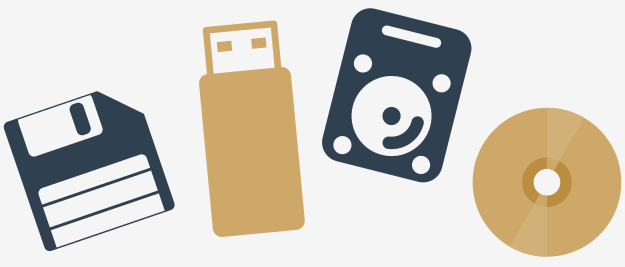

Salah satu masalah paling umum dalam pekerjaan pengembang adalah memproses data yang disimpan dalam file sementara file tersebut biasanya disimpan secara fisik menggunakan perangkat penyimpanan - hard disk, optik, jaringan, atau solid-state.

Sangat mudah untuk membayangkan program yang mengurutkan 20 angka, dan sama mudahnya untuk membayangkan pengguna program ini memasukkan dua puluh angka ini langsung dari keyboard.

Jauh lebih sulit membayangkan tugas yang sama ketika ada 20.000 nomor yang harus diurutkan, dan tidak ada satu pengguna pun yang dapat memasukkan nomor-nomor ini tanpa membuat kesalahan.

Jauh lebih mudah untuk membayangkan bahwa angka-angka ini disimpan dalam file disk yang dibaca oleh program. Program ini mengurutkan nomor dan tidak mengirimkannya ke layar, melainkan membuat file baru dan menyimpan urutan nomor yang diurutkan di sana.

Jika kita ingin mengimplementasikan database sederhana, satu-satunya cara untuk menyimpan informasi antar program berjalan adalah dengan menyimpannya ke dalam file (atau banyak file jika database Anda lebih kompleks). 



### Perhatikan filename sesuai dengan OS yang digunkaan
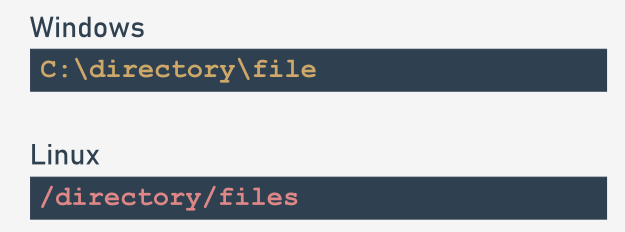

### FileStream
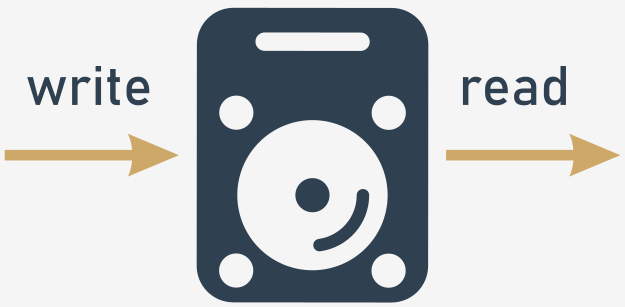
Ada dua operasi dasar yang dilakukan di stream:

- membaca dari stream: bagian data diambil dari file dan ditempatkan di area memori yang dikelola oleh program (misalnya, variabel);
- menulis/write ke stream: bagian data dari memori (misalnya, variabel) ditransfer ke file.

Ada tiga mode dasar yang digunakan untuk membuka stream:

- mode baca: stream yang dibuka dalam mode ini memungkinkan operasi baca saja; mencoba menulis ke stream akan menyebabkan pengecualian (pengecualian bernama UnsupportedOperation, yang mewarisi OSError dan ValueError, dan berasal dari modul io);
- mode tulis: stream yang dibuka dalam mode ini memungkinkan operasi tulis saja; mencoba membaca stream akan menyebabkan pengecualian yang disebutkan di atas;
- mode update: stream yang dibuka dalam mode ini memungkinkan penulisan dan pembacaan. 

### File handles
Python mengasumsikan bahwa setiap file tersembunyi di balik objek dengan kelas yang memadai. 

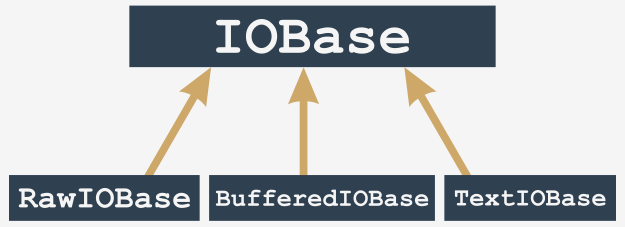

Untuk tujuan pembelajaran, kita hanya akan memperhatikan stream yang diwakili oleh objek BufferIOBase dan TextIOBase


### text & biner

Aliran teks yang terstruktur dalam baris; artinya, file berisi karakter tipografi (huruf, angka, tanda baca, dll.) yang disusun dalam baris (garis), seperti yang terlihat dengan mata telanjang saat Anda melihat konten file di editor.

File ini ditulis (atau dibaca) sebagian besar karakter demi karakter, atau baris demi baris.

Aliran biner tidak berisi teks tetapi urutan byte dari nilai apa pun. Urutan ini dapat berupa, misalnya, program yang dapat dijalankan, gambar, audio atau klip video, file database, dll. 

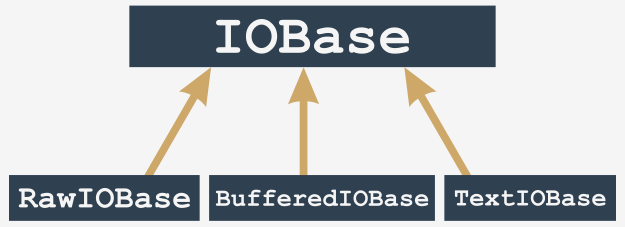

### `open()` dan `close()`

In [ ]:
#buat file pada desktop dengan nama file.txt
try:
    #sesuaikan dengan direktori dekstop
    stream = open(r"C:\Users\Winstein\Documents\GitHub\py-dts\oop.txt", "rt") 
    # Processing goes here.
    stream.close()
except Exception as exc:
    print("Cannot open the file:", exc)


### Pre-opened streams

Kami mengatakan sebelumnya bahwa operasi aliran apa pun harus didahului oleh pemanggilan fungsi open (). Ada tiga pengecualian yang ditentukan dengan baik untuk aturan tersebut.

Saat program kami dimulai, ketiga aliran sudah dibuka dan tidak memerlukan persiapan tambahan. Terlebih lagi, program Anda dapat menggunakan aliran ini secara eksplisit jika Anda berhati-hati dalam mengimpor modul sys: 

<code> import sys </code>

karena di situlah deklarasi tiga aliran ditempatkan.

Nama aliran ini adalah: <code>sys.stdin</code>, <code>sys.stdout</code>, dan <code>sys.stderr</code>.

Mari kita analisis mereka:

- sys.stdin
  - stdin (sebagai input standar)
  - aliran stdin biasanya dikaitkan dengan keyboard, pra-buka untuk membaca dan dianggap sebagai sumber data utama untuk program yang sedang berjalan;
  - fungsi input () yang terkenal membaca data dari stdin secara default.

- sys.stdout
  - stdout (sebagai keluaran standar)
  - aliran stdout biasanya dikaitkan dengan layar, pre-open untuk menulis, dianggap sebagai target utama untuk mengeluarkan data oleh program yang sedang berjalan;
  - fungsi print () yang terkenal mengeluarkan data ke stream stdout.

- sys.stderr
  - stderr (sebagai keluaran kesalahan standar)
  - stream stderr biasanya dikaitkan dengan layar, pra-buka untuk menulis, dianggap sebagai tempat utama di mana program yang sedang berjalan harus mengirimkan informasi tentang kesalahan yang ditemui selama bekerja;
  - pemisahan stdout (hasil berguna yang dihasilkan oleh program) dari stderr (pesan kesalahan, tidak dapat disangkal berguna tetapi tidak memberikan hasil) memberikan kemungkinan untuk mengarahkan kedua jenis informasi ini ke target yang berbeda. Diskusi yang lebih luas tentang masalah ini berada di luar cakupan kursus. Buku pegangan sistem operasi akan memberikan lebih banyak informasi tentang masalah ini. 


### Diagnosing stream problems

Objek IOError dilengkapi dengan properti bernama errno (nama berasal dari nomor kesalahan frase) dan Anda dapat mengaksesnya sebagai berikut: 

- errno.EACCES → Permission denied
- errno.EBADF → Bad file number
- errno.EEXIST → File exists
- errno.EFBIG → File too large
- errno.EISDIR → Is a directory
- errno.EMFILE → Too many open files
- errno.ENOENT → No such file or directory
- errno.ENOSPC → No space left on device

In [ ]:
try:
    # Some stream operations.
    s = open("c:/users/user/Desktop/file.txt", "rt")
except IOError as exc:
    print(exc.errno)

### `strerror()`

In [ ]:
import errno

try:
    s = open("c:/users/user/Desktop/file.txt", "rt")
    # Actual processing goes here.
    s.close()
except Exception as exc:
    if exc.errno == errno.ENOENT:
        print("The file doesn't exist.")
    elif exc.errno == errno.EMFILE:
        print("You've opened too many files.")
    else:
        print("The error number is:", exc.errno)


In [ ]:
from os import strerror

try:
    s = open("c:/users/user/Desktop/file.txt", "rt")
    # Actual processing goes here.
    s.close()
except Exception as exc:
    print("The file could not be opened:", strerror(exc.errno))

## Working with Real files

file mode:



|Text mode |	Binary mode |	Description|
|-----------|-----------------|-------------|
|rt|	rb|	read|
|wt|	wb|	write|
|at	|ab	|append|
|r+t|	r+b|	read and update|
|w+t	|w+b|	write and update|

### File Methods
* Read methods

```python
stream.read(idx)
stream.readline()
stream.readlines(n) #multiple lines

```

* write methods

```python
stream.write(str)
```

In [ ]:
stream = open("oop.txt", "rt")
print(stream.read())
stream.close()

### `read()`

In [ ]:
s = open("oop.txt", "rt")
print(s.read(1))
print(s.read(1))
print(s.read(1))
print(s.read(1))

In [ ]:
from os import strerror

try:
    cnt = 0
    s = open("oop.txt", "rt")
    ch = s.read(1)
    while ch != '':
        print(ch,end = '')
        cnt += 1
        ch = s.read(1)
    s.close()
    print("\n\nCharacters in file:", cnt)
except IOError as e:
    print("I/O error occurred: ", strerr(e.errno))

### `readline()`

In [ ]:
from os import strerror

try:
    ccnt = lcnt = 0
    s = open("oop.txt", "rt")
    line = s.readline()
    while line != '':
        lcnt += 1
        for ch in line:
            ccnt += 1
        print(line)
        line = s.readline()
    s.close()
    print("\n\nCharacters in file:", ccnt)
    print("Lines in file:     ", lcnt)
except IOError as e:
    print("I/O error occurred:", strerror(e.errno))

### `readlines()`

In [ ]:
from os import strerror

try:
    ccnt = lcnt = 0
    s = open("oop.txt", "rt")
    lines = s.readlines(1)
    while len(lines) != 0:
        for line in lines:
            lcnt += 1
            for ch in line:
                print(ch, end='')
                ccnt += 1
        lines = s.readlines(1)
    s.close()
    print("\n\nCharacters in file:", ccnt)
    print("Lines in file:     ", lcnt)
except IOError as e:
    print("I/O error occurred:", strerror(e.errno))


### `write`

In [ ]:
from os import strerror

try:
    fo = open('newtext.txt', 'wt')
    for i in range(10):
        fo.write("line #" + str(i+1) + "\n")
    fo.close()
except IOError as e:
    print("I/O error occurred: ", strerr(e.errno))

### `append`

In [ ]:
from os import strerror

try:
    fo = open('newtext.txt', 'at')
    for i in range(10,20):
        fo.write("line #" + str(i+1) + "\n")
    fo.close()
except IOError as e:
    print("I/O error occurred: ", strerr(e.errno))

### bytesarray

sebelum kita belajar membaca file binary, ada baiknya kita mengetahui apa itu _amorphous data_.

_Amorphous data_ adalah suatu tipe data yang tidak memiliki bentuk yang spesifik (isinya hanya byte saja). Contohnya file gambar. Python "membaca" gambar sebagai byte, padahal kita "membaca" gambar sebagai suatu obyek keseluruhan

Amorphous data tidak bisa kita simpan dan perlakukan seperti text - karena mereka bukan string ataupun list.

bytearray adalah sebuah wadah khusus untuk menghandle amorphous data

In [ ]:
data = bytearray(10) #contoh bytearray dibuat dalam python, secara default bernilai 0
print(data)
print(len(data))

Bytearrays mirip seperti list, mereka __mutable__, bisa menggunakan fungsi `len()` dan bisa diakses tiap elemennya dengan indexing

Salah satu pembedanya adalah : elemen dari byte array tidak bisa diisi nilai yang bukan integer (akan muncul TypeError) dan tidak bisa diisi nilai selain 0 - 255 (akan muncul ValueError), diluar itu semua, kita bisa menganggap isi bytearray sebagai integer biasa

Note: Disini digunakan fungsi `hex()` untuk melihat isi dari bytearray sebagai bilangan hexadesimal

In [ ]:
data = bytearray(10)

for i in range(len(data)):
    data[i] = 10 - i

for b in data:
    print(hex(b),'=',int(b))

### Membuat file bytearray

In [5]:
from os import strerror

data = bytearray(10)

for i in range(len(data)):
    data[i] = 10 - i
try:
    bf = open('file.bin', 'wb')
    bf.write(data)
    bf.close()
except IOError as e:
    print("I/O error occurred:", strerror(e.errno))

# Your code that reads bytes from the stream should go here.

### Membaca file bytearray

In [6]:
from os import strerror

try:
    bf = open(r'C:\Users\Winstein\Documents\GitHub\py-dts\file.bin', 'rb')
    data = bytearray(bf.read())
    bf.close()
    print(data)
except IOError as e:
    print("I/O error occurred:", strerror(e.errno))

bytearray(b'\n\t\x08\x07\x06\x05\x04\x03\x02\x01')


### Contoh : Mengcopy suatu File dengan ByteArray

In [ ]:
from os import strerror

srcname = input("Enter the source file name: ") #ambil file
try:
    src = open(srcname, 'rb')
except IOError as e:
    print("Cannot open the source file: ", strerror(e.errno))
    exit(e.errno)

dstname = input("Enter the destination file name: ") #lokasi file yang baru
try:
    dst = open(dstname, 'wb')
except Exception as e:
    print("Cannot create the destination file: ", strerror(e.errno))
    src.close()
    exit(e.errno)

buffer = bytearray(65536)
total  = 0
try:
    readin = src.readinto(buffer)
    while readin > 0:
        written = dst.write(buffer[:readin])
        total += written
        readin = src.readinto(buffer)
except IOError as e:
    print("Cannot create the destination file: ", strerror(e.errno))
    exit(e.errno)
    
print(total,'byte(s) succesfully written')
src.close()
dst.close()


# Module `os`
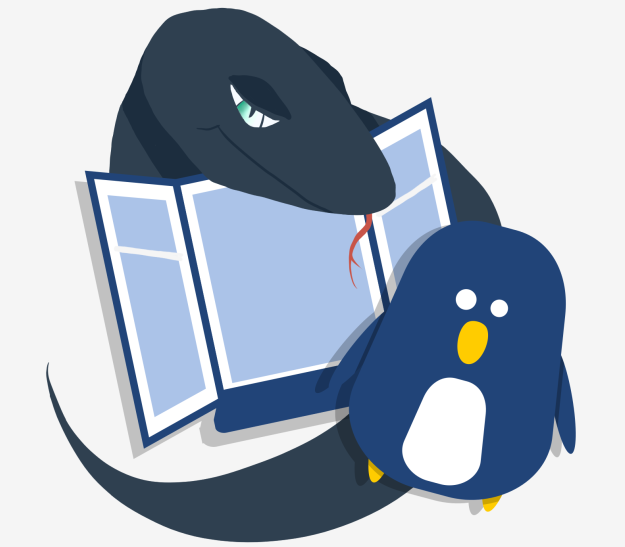

### osname

In [4]:
import os
print(os.name)
print(os.getcwd())

nt
C:\Users\Winstein\Documents\GitHub\py-dts\my_first_directory


### mkdir
make directory - create folder

In [2]:
print(os.listdir())
os.makedirs("my_first_directory/my_second_directory")
os.chdir("my_first_directory")
print(os.listdir())

['.git', '.ipynb_checkpoints', '2020', '2021', 'Extra Courses', 'PE1 Module 1 - Pengenalan Python dan Bahasa Pemrograman.ipynb', 'PE1 Module 2 - Tipe Data, Variabel, Dasar Input Output, Operasi.ipynb', 'PE1 Module 3 - Operator kondisi, perulangan, list dan operasinya, bitwise, boolean.ipynb', 'PE1 Module 4 - Function Tuple Dictionaries and Data Processing.ipynb', 'PE2 Module 1 - Modules, Packages and PIP.ipynb', 'PE2 Module 2 - Exceptions, Strings, String and List Methods.ipynb', 'PE2 Module 3 - Pemrograman Berbasis Obyek.ipynb', 'PE2 Module 4 - Miscellaneous.ipynb', 'README.md']
['my_second_directory']


### cwd
where am I now? - get current directory

In [15]:
os.makedirs("my_first_directory/my_second_directory")
os.chdir("my_first_directory")
print(os.getcwd())
os.chdir("my_second_directory")
print(os.getcwd())

C:\Users\Winstein\Documents\GitHub\py-dts\my_first_directory
C:\Users\Winstein\Documents\GitHub\py-dts\my_first_directory\my_second_directory


### rmdir
remove directory - delete folder

In [18]:
os.mkdir("my_first_directory")
print(os.listdir())

['.git', '.ipynb_checkpoints', '2020', '2021', 'Extra Courses', 'my_first_directory', 'PE1 Module 1 - Pengenalan Python dan Bahasa Pemrograman.ipynb', 'PE1 Module 2 - Tipe Data, Variabel, Dasar Input Output, Operasi.ipynb', 'PE1 Module 3 - Operator kondisi, perulangan, list dan operasinya, bitwise, boolean.ipynb', 'PE1 Module 4 - Function Tuple Dictionaries and Data Processing.ipynb', 'PE2 Module 1 - Modules, Packages and PIP.ipynb', 'PE2 Module 2 - Exceptions, Strings, String and List Methods.ipynb', 'PE2 Module 3 - Pemrograman Berbasis Obyek.ipynb', 'PE2 Module 4 - Miscellaneous.ipynb', 'README.md']


In [19]:
os.rmdir("my_first_directory")
print(os.listdir())

['.git', '.ipynb_checkpoints', '2020', '2021', 'Extra Courses', 'PE1 Module 1 - Pengenalan Python dan Bahasa Pemrograman.ipynb', 'PE1 Module 2 - Tipe Data, Variabel, Dasar Input Output, Operasi.ipynb', 'PE1 Module 3 - Operator kondisi, perulangan, list dan operasinya, bitwise, boolean.ipynb', 'PE1 Module 4 - Function Tuple Dictionaries and Data Processing.ipynb', 'PE2 Module 1 - Modules, Packages and PIP.ipynb', 'PE2 Module 2 - Exceptions, Strings, String and List Methods.ipynb', 'PE2 Module 3 - Pemrograman Berbasis Obyek.ipynb', 'PE2 Module 4 - Miscellaneous.ipynb', 'README.md']


In [23]:
returned_value = os.system("mkdir my_first_directory")
print(returned_value)

1


In [24]:
import os

for file in os.listdir():
    if file.endswith('ipynb'):
        print(file)

PE1 Module 1 - Pengenalan Python dan Bahasa Pemrograman.ipynb
PE1 Module 2 - Tipe Data, Variabel, Dasar Input Output, Operasi.ipynb
PE1 Module 3 - Operator kondisi, perulangan, list dan operasinya, bitwise, boolean.ipynb
PE1 Module 4 - Function Tuple Dictionaries and Data Processing.ipynb
PE2 Module 1 - Modules, Packages and PIP.ipynb
PE2 Module 2 - Exceptions, Strings, String and List Methods.ipynb
PE2 Module 3 - Pemrograman Berbasis Obyek.ipynb
PE2 Module 4 - Miscellaneous.ipynb


# <code>datetime</code> and <code>time</code> Module

In [28]:
from datetime import date

today = date.today()

print("Today:", today)
print("Year:", today.year)
print("Month:", today.month)
print("Day:", today.day)

Today: 2022-10-13
Year: 2022
Month: 10
Day: 13


In [33]:
import time

timestamp = time.time()
print("Timestamp:", timestamp)

d = date.fromtimestamp(timestamp)
print("Date:", d)

Timestamp: 1665664388.6705425
Date: 2022-10-13


### ISO format

In [34]:
d = date.fromisoformat('2022-03-01')
print(d)

2022-03-01


### Replace Method

In [38]:
d = date(1991, 2, 5)
print(d)

d = d.replace(year=2022, month=4, day=4)
print(d)


1991-02-05
2022-04-04


In [50]:
d = date(3000,1,1)
print(d.weekday())

2


### Creating time object

In [51]:
from datetime import time as dtime

t = dtime(14, 53, 20, 151659)

print("Time:", t)
print("Hour:", t.hour)
print("Minute:", t.minute)
print("Second:", t.second)
print("Microsecond:", t.microsecond)

Time: 14:53:20.151659
Hour: 14
Minute: 53
Second: 20
Microsecond: 151659


### Time Module

In [53]:
import time
class Student:
    def take_nap(self, seconds):
        print("I'm very tired. I have to take a nap. See you later.")
        time.sleep(seconds)
        print("I slept well! I feel great!")

student = Student()
student.take_nap(5)


I'm very tired. I have to take a nap. See you later.
I slept well! I feel great!


### `ctime()` function

In [69]:
timestamp = 31999999999.9
print(time.ctime(timestamp))

Thu Jan 15 15:53:19 2984


In [106]:
from datetime import datetime
import time

schedule = '2022-10-13 19:59'
sch_time = time.mktime(datetime.strptime(schedule,'%Y-%m-%d %H:%M').timetuple())
print(sch_time)

while True:
    print(time.time())
    if int(time.time()) == int(sch_time):
        break
else:
    print('Selesai')

1665665940.0
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.438833
1665665901.4388

1665665901.6273282
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.734043
1665665901.7350402
1665665901.7350402
1665665901.7350402
1665665901.7350402
1665665901.7350402
1665665901.7350402
1665665901.7350402
16

1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9903564
1665665901.9

1665665902.120011
1665665902.2177515
1665665902.2177515
1665665902.2177515
1665665902.2177515
1665665902.2177515
1665665902.2177515
1665665902.2177515
1665665902.2177515
1665665902.2177515
1665665902.2177515
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.2187467
1665665902.21

1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.403252
1665665902.4042506
1665665902.4042506
1665665902.4042506
1665665902.4042506
166566

1665665902.5119627
1665665902.5957382
1665665902.5957382
1665665902.5957382
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5967357
1665665902.5977328
1665665902.5977328
1665665902.5977328
1665665902.5977328
1665665902.5977328
1665665902.5977328
1665665902.5977328
1665665902.5977328
1665665902.5977328
1665665902.5977328
1665665902.5977328
1665665902.5977328
1665665902.5

1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8341012
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8350976
1665665902.8

1665665902.9822114
1665665903.0480368
1665665903.0480368
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0490327
1665665903.0500312
1665665903.0500312
1665665903.0500312
1665665903.0500312
1665665903.0500312
1665665903.0500312
1665665903.0500312
1665665903.0500312
1665665903.0500312
1665665903.0500312
1665665903.0

1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2534862
1665665903.2

1665665903.4110646
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.4549472
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5147877
1665665903.5157852
1665665903.5

1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903.644441
1665665903

1665665903.7765982
1665665903.8364365
1665665903.8364365
1665665903.8364365
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8374343
1665665903.8

1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0608764
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.0618734
1665665904.062871
1665665904.06

1665665904.2254372
1665665904.3496127
1665665904.3496127
1665665904.3496127
1665665904.3496127
1665665904.3496127
1665665904.3496127
1665665904.3496127
1665665904.3496127
1665665904.3496127
1665665904.3496127
1665665904.3496127
1665665904.3496127
1665665904.3496127
1665665904.3496127
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3506103
1665665904.3516083
1665665904.3516083
1665665904.3516083
1665665904.3516083
1665665904.3516083
1665665904.3516083
1665665904.3516083
1665665904.3516083
1665665904.3546004
1665665904.3546004
1665665904.3

1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5698907
1665665904.5

1665665904.724478
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.7733474
1665665904.774345
1665665904.774345
1665665904.774345
1665665904.774345
1665665904.774345
1665665904.774345
1665665904.774345
1665665904.774345
1665665904.774345
1665665904.774345
1665

1665665904.9558594
1665665904.9568558
1665665904.9568558
1665665904.9568558
1665665904.9568558
1665665904.9568558
1665665904.9568558
1665665904.9568558
1665665904.9568558
1665665904.9568558
1665665904.9568558
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9578528
1665665904.9

1665665905.0944881
1665665905.1533313
1665665905.1533313
1665665905.1533313
1665665905.1533313
1665665905.1533313
1665665905.1533313
1665665905.1543286
1665665905.1553254
1665665905.1553254
1665665905.1553254
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1563227
1665665905.1573198
1665665905.1573198
1665665905.1573198
1665665905.1573198
1665665905.1

1665665905.38172
1665665905.3847122
1665665905.3847122
1665665905.3847122
1665665905.3847122
1665665905.3847122
1665665905.3847122
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3857095
1665665905.3867066
1665665905.3867066
1665665905.3867066
1665665905.3867066
1665665905.386

1665665905.5402956
1665665905.5891652
1665665905.5891652
1665665905.5891652
1665665905.5891652
1665665905.5891652
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5901632
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5911603
1665665905.5

1665665905.8458195
1665665905.8458195
1665665905.8458195
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8468156
1665665905.8478131
1665665905.8478131
1665665905.8478131
1665665905.8478131
1665665905.8478131
1665665905.8478131
1665665905.8478131
1665665905.8478131
1665665905.8

1665665905.9714816
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1160965
1665665906.1

1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3557081
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3567052
1665665906.3

1665665906.5312393
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.585095
1665665906.5860922
1665665906.5860922
1665665906.5860922
1665665906.5860922
1665665906.5860922
1665665906.5860922
1665665906.5860922
1665665906.5860922
1665665906.5860922


1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8374197
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8384166
1665665906.8

1665665907.0049715
1665665907.0468597
1665665907.0468597
1665665907.0468597
1665665907.0468597
1665665907.0468597
1665665907.0468597
1665665907.0468597
1665665907.0468597
1665665907.0468597
1665665907.0468597
1665665907.0468597
1665665907.0468597
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0478568
1665665907.0

1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.238347
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907.2393444
1665665907

1665665907.3789716
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4537714
1665665907.4547696
1665665907.4

1665665907.6310377
1665665907.633032
1665665907.633032
1665665907.633032
1665665907.633032
1665665907.633032
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.6340292
1665665907.634029

1665665907.7851403
1665665907.8908548
1665665907.8908548
1665665907.8908548
1665665907.8908548
1665665907.8908548
1665665907.8908548
1665665907.8908548
1665665907.8908548
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8918529
1665665907.8

1665665908.1352024
1665665908.1352024
1665665908.1352024
1665665908.1352024
1665665908.1352024
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1362002
1665665908.1

1665665908.3137248
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.420439
1665665908.4214368
1665665908.4214368
1665665908.4214368
1665665908.4214368
1665665908.4214368
1665665908.4214368
1665665908.4214368
1665665908.4214368
1665665908.4214368
1665665908.4214368
1665665908.4214368
1665665908.4214368
1665665908.4224339
1665665908.4264216
1665665908.4264216
1665665908.4264216
1665665908.4264216
1665665908.4264216
1665665908.4264216
1665665908.4264216
1665665908.4264216
1665665908.4264216
1665665908.4264216
1665

1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6189086
1665665908.6199057
1665665908.6199057
1665665908.6199057
1665665908.6199057
1665665908.6199057
1665665908.6199057
1665665908.6199057
1665665908.6199057
1665665908.6199057
1665665908.6199057
1665665908.6199057
1665665908.6199057
1665665908.6199057
1665665908.6199057
1665665908.6

1665665908.792443
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8213673
1665665908.8223634
1665665908.8223634
1665665908.8223634
1665665908.8223634
1665665908.8223634
1665665908.8223634
1665665908.8223634
1665665908.8223634
1665665908.82

1665665909.0432835
1665665909.0432835
1665665909.0432835
1665665909.0432835
1665665909.0432835
1665665909.0432835
1665665909.0432835
1665665909.0432835
1665665909.0432835
1665665909.0432835
1665665909.0432835
1665665909.0432835
1665665909.0432835
1665665909.0432835
1665665909.0432835
1665665909.0442815
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0452788
1665665909.0

1665665909.214828
1665665909.3065834
1665665909.3065834
1665665909.3065834
1665665909.3065834
1665665909.3065834
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3075798
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.3095744
1665665909.30

1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5294948
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5304923
1665665909.5

1665665909.7040284
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.7070203
1665665909.708017
1665665909.708017
1665665909.708017
1665665909.7080

1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8975115
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8985078
1665665909.8

1665665910.0431218
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1059527
1665665910.1

1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.3034258
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30542
1665665910.30

1665665910.4734812
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
1665665910.510385
166566591

1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.7078557
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
1665665910.708852
16

1665665910.8833854
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.9567018
1665665910.957699
1665665910.957699
1665665910.957699
1665665910.9576

1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911.173139
1665665911

1665665911.343195
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.389071
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665911.3900688
1665665

1665665911.6104796
1665665911.6114771
1665665911.6114771
1665665911.6114771
1665665911.6114771
1665665911.6114771
1665665911.6114771
1665665911.6114771
1665665911.6114771
1665665911.6114771
1665665911.6114771
1665665911.6114771
1665665911.6114771
1665665911.6114771
1665665911.6114771
1665665911.6114771
1665665911.6114771
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6124747
1665665911.6

1665665911.7740421
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8019674
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8029642
1665665911.8

1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0163934
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0173912
1665665912.0

1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2078817
1665665912.2

1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.4103434
1665665912.411341
1665665912.411341
1665665912.411341
1665665912.411341
1665665912.411341
1665665912.411341
1665665912.411341
1665665912.411341
1665665912.411341
1665665912.411341
1665665912.411341
1665665912.411341
1665665912.411341
1665665912.411341
1665665912.411341
16656659

1665665912.5529106
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.6521556
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653154
1665665912.653

1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8895192
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.8915138
1665665912.892512
1665665912.892512
1665665912.892512
1665665912.892512
1665665912.89251

1665665913.0680428
1665665913.1129227
1665665913.1129227
1665665913.1129227
1665665913.1129227
1665665913.1129227
1665665913.1129227
1665665913.1129227
1665665913.1129227
1665665913.1129227
1665665913.1129227
1665665913.1129227
1665665913.1129227
1665665913.1129227
1665665913.1129227
1665665913.1129227
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1139202
1665665913.1

1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3443036
1665665913.3

1665665913.5138512
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.5412867
1665665913.54329
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.5462728
1665665913.546

1665665913.782152
1665665913.782152
1665665913.782152
1665665913.782152
1665665913.782152
1665665913.782152
1665665913.782152
1665665913.782152
1665665913.782152
1665665913.782152
1665665913.782152
1665665913.782152
1665665913.782152
1665665913.782152
1665665913.782152
1665665913.782152
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
1665665913.7831488
166566591

1665665913.973639
1665665914.0426514
1665665914.0426514
1665665914.0426514
1665665914.0426514
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
1665665914.043648
166566

1665665914.2242734
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2252705
1665665914.2

1665665914.4082928
1665665914.417269
1665665914.417269
1665665914.417269
1665665914.417269
1665665914.417269
1665665914.417269
1665665914.417269
1665665914.417269
1665665914.417269
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
1665665914.4182668
16

1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6007783
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6017761
1665665914.6

1665665914.7663348
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.803237
1665665914.8042343
1665665914.8042343
1665665914.8042343
1665665914.8042343
1665665914.8042343
1665665914.8042343
1665665914.8042343
1665665914.8042343
1665665914.8042343
1665665914.8042343
1665665914.8042343
1665665914.8042343
1665665914.8042

1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0406027
1665665915.0

1665665915.2081532
1665665915.2714922
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.272489
1665665915.273487
1665665915.273487
1665665915.273487
1665665915.273487
1665665915.273487
1665665915.273487
1665665915.273487
1665665915.273487
1665665915.273487
16656659

1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4789407
1665665915.4

1665665915.6195643
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6734238
1665665915.6744208
1665665915.6744208
1665665915.6744208
1665665915.6744208
1665665915.6744208
1665665915.6744208
1665665915.6744208
1665665915.6744208
1665665915.6744208
1665665915.6744208
1665665915.6744208
1665665915.6744208
1665665915.6

1665665915.8702106
1665665915.8702106
1665665915.8702106
1665665915.8702106
1665665915.8702106
1665665915.8702106
1665665915.8702106
1665665915.8702106
1665665915.8702106
1665665915.8702106
1665665915.8702106
1665665915.8702106
1665665915.8702106
1665665915.8702106
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8712082
1665665915.8

1665665916.0188131
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0816445
1665665916.0

1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.2781186
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.279116
1665665916.27

1665665916.4237297
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4725993
1665665916.4

1665665916.6940064
1665665916.6940064
1665665916.6940064
1665665916.6940064
1665665916.6940064
1665665916.6940064
1665665916.6940064
1665665916.6940064
1665665916.6940064
1665665916.6940064
1665665916.6940064
1665665916.6940064
1665665916.6950037
1665665916.6950037
1665665916.6950037
1665665916.6950037
1665665916.6950037
1665665916.6950037
1665665916.6950037
1665665916.6950037
1665665916.6950037
1665665916.6950037
1665665916.6950037
1665665916.6950037
1665665916.6950037
1665665916.6950037
1665665916.6950037
1665665916.6950037
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.696001
1665665916.6969986
1665665916.6979964
1665665916.6979964
1665665916.6979964
1665665916.6979964
1665665916.6979964
1665665916.6979964
1665665916.6979964
1665665916

1665665916.8396175
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9013379
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9023345
1665665916.9

1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1047924
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1057901
1665665917.1

1665665917.2596495
1665665917.3025355
1665665917.3025355
1665665917.3025355
1665665917.3025355
1665665917.3025355
1665665917.3025355
1665665917.3025355
1665665917.3025355
1665665917.3025355
1665665917.3025355
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3035321
1665665917.3

1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5563877
1665665917.5

1665665917.7179556
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.772808
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
1665665917.7738054
166566

1665665917.9563177
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9573147
1665665917.9583125
1665665917.9583125
1665665917.9583125
1665665917.9583125
1665665917.9583125
1665665917.9583125
1665665917.9

1665665918.121875
1665665918.177725
1665665918.177725
1665665918.1787224
1665665918.1787224
1665665918.1787224
1665665918.1787224
1665665918.1787224
1665665918.1787224
1665665918.1787224
1665665918.1787224
1665665918.1787224
1665665918.1797197
1665665918.1797197
1665665918.1797197
1665665918.1797197
1665665918.1797197
1665665918.1797197
1665665918.1797197
1665665918.1797197
1665665918.1797197
1665665918.1807175
1665665918.1807175
1665665918.1807175
1665665918.1807175
1665665918.1807175
1665665918.1807175
1665665918.1807175
1665665918.1807175
1665665918.1807175
1665665918.1817148
1665665918.182712
1665665918.182712
1665665918.182712
1665665918.182712
1665665918.182712
1665665918.182712
1665665918.1837094
1665665918.1847074
1665665918.1847074
1665665918.1847074
1665665918.1847074
1665665918.1847074
1665665918.1847074
1665665918.1847074
1665665918.1847074
1665665918.1847074
1665665918.185705
1665665918.185705
1665665918.185705
1665665918.185705
1665665918.185705
1665665918.185705
16656659

1665665918.4220731
1665665918.4220731
1665665918.4220731
1665665918.4220731
1665665918.4220731
1665665918.4220731
1665665918.4220731
1665665918.4220731
1665665918.4220731
1665665918.4220731
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4230695
1665665918.4

1665665918.5901477
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6569686
1665665918.6579661
1665665918.6

1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.853983
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.85498
1665665918.

1665665919.0115397
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0878444
1665665919.0888417
1665665919.0888417
1665665919.0888417
1665665919.0888417
1665665919.0888417
1665665919.0888417
1665665919.0

1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.305262
1665665919.30626
1665665919.30626
1665665919.30626
1665665919.30626
1665665919.30626
1665665919.30626
1665665919.30626
1665665919.30626
1665665919.30626
1665665919.30626
1665665919.30626
1665665919.30626
1665665919.30626
1665665919.30626
1665665919.30626
1665665919.30626
1665665919.30626
166566591

1665665919.46683
1665665919.5087173
1665665919.5087173
1665665919.5087173
1665665919.5087173
1665665919.5087173
1665665919.5087173
1665665919.5087173
1665665919.5087173
1665665919.5087173
1665665919.5087173
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.5097158
1665665919.510713
1665665919.510713
1665665919.510713
1665665919.510713
1665665919.510713
1665665919.510713
1665665919.510713
1665665919.510713
1665665919.510713
1665

1665665919.7341163
1665665919.7341163
1665665919.7341163
1665665919.7341163
1665665919.7341163
1665665919.7341163
1665665919.7341163
1665665919.7351124
1665665919.7351124
1665665919.73611
1665665919.739102
1665665919.739102
1665665919.739102
1665665919.739102
1665665919.739102
1665665919.739102
1665665919.739102
1665665919.739102
1665665919.739102
1665665919.739102
1665665919.739102
1665665919.7400997
1665665919.7400997
1665665919.7400997
1665665919.7400997
1665665919.7400997
1665665919.7400997
1665665919.7400997
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
1665665919.7410967
166566

1665665919.887704
1665665919.9545264
1665665919.9545264
1665665919.9545264
1665665919.9545264
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.9555247
1665665919.95

1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1719477
1665665920.1729453
1665665920.1729453
1665665920.1729453
1665665920.1729453
1665665920.1

1665665920.3215482
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3778217
1665665920.3788192
1665665920.3788192
1665665920.3788192
1665665920.3788192
1665665920.3788192
1665665920.3788192
1665665920.3788192
1665665920.3788192
1665665920.3788192
1665665920.3788192
1665665920.3788192
1665665920.3788192
1665665920.3788192
1665665920.3

1665665920.5802798
1665665920.5802798
1665665920.5802798
1665665920.5802798
1665665920.5802798
1665665920.5802798
1665665920.5802798
1665665920.5802798
1665665920.5802798
1665665920.5802798
1665665920.5802798
1665665920.5802798
1665665920.5812774
1665665920.5812774
1665665920.5812774
1665665920.5812774
1665665920.5812774
1665665920.5812774
1665665920.5812774
1665665920.5812774
1665665920.5812774
1665665920.582275
1665665920.582275
1665665920.582275
1665665920.582275
1665665920.582275
1665665920.582275
1665665920.582275
1665665920.5832722
1665665920.5832722
1665665920.5832722
1665665920.5832722
1665665920.5832722
1665665920.5832722
1665665920.5832722
1665665920.5832722
1665665920.5832722
1665665920.5832722
1665665920.5842698
1665665920.5842698
1665665920.5842698
1665665920.5862641
1665665920.588259
1665665920.588259
1665665920.588259
1665665920.588259
1665665920.588259
1665665920.588259
1665665920.588259
1665665920.588259
1665665920.588259
1665665920.588259
1665665920.588259
1665665920.

1665665920.7368615
1665665920.7707705
1665665920.7707705
1665665920.7707705
1665665920.7707705
1665665920.7707705
1665665920.7707705
1665665920.7707705
1665665920.7707705
1665665920.7707705
1665665920.7707705
1665665920.7707705
1665665920.7707705
1665665920.7707705
1665665920.7707705
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7717686
1665665920.7

1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9931755
1665665920.9941723
1665665920.9941723
1665665920.9941723
1665665920.9941723
1665665920.9941723
1665665920.9941723
1665665920.9941723
1665665920.9941723
1665665920.9

1665665921.1657143
1665665921.195634
1665665921.195634
1665665921.195634
1665665921.195634
1665665921.197629
1665665921.1996233
1665665921.1996233
1665665921.1996233
1665665921.1996233
1665665921.1996233
1665665921.1996233
1665665921.1996233
1665665921.1996233
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2006216
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.2016191
1665665921.201619

1665665921.3866334
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3896246
1665665921.3

1665665921.5232697
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.5711575
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139
1665665921.572139


1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7612753
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7622714
1665665921.7632685
1665665921.7

1665665921.9372308
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9561803
1665665921.9

1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1446762
1665665922.1

1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.335167
1665665922.3361638
1665665922.3361638
1665665922.3361638
1665665922.3361638
1665665922.3361638
1665665922.3361638
1665665922.3361638
1665665922.3361638
1665665922.3361638
1665665922.3361638
1665665922.3361638
1665665922.3361638
1665665922.3361638
1665665922.3361638
1665665922.3361638
1665665922.33

1665665922.5216682
1665665922.5216682
1665665922.5216682
1665665922.5216682
1665665922.5216682
1665665922.5216682
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5226653
1665665922.5

1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7091663
1665665922.7

1665665922.8986814
1665665922.8986814
1665665922.8986814
1665665922.8986814
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8996787
1665665922.8

1665665923.0492787
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0951562
1665665923.0

1665665923.2826538
1665665923.2826538
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
1665665923.283652
16656659

1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4726574
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4736547
1665665923.4

1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923.662171
1665665923

1665665923.830231
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.8651383
1665665923.86

1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0526373
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0536337
1665665924.0

1665665924.2112136
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2670631
1665665924.2680604
1665665924.2680604
1665665924.2680604
1665665924.2

1665665924.4575536
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4585507
1665665924.4

1665665924.6066654
1665665924.6445632
1665665924.6445632
1665665924.6445632
1665665924.6445632
1665665924.6445632
1665665924.6445632
1665665924.6445632
1665665924.6445632
1665665924.6445632
1665665924.6445632
1665665924.6445632
1665665924.6445632
1665665924.6445632
1665665924.6445632
1665665924.6445632
1665665924.6445632
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6455603
1665665924.6

1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8400333
1665665924.8410313
1665665924.8410313
1665665924.8410313
1665665924.8410313
1665665924.8

1665665924.991628
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.0270853
1665665925.02

1665665925.2066705
1665665925.2066705
1665665925.2066705
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2076693
1665665925.2

1665665925.3956764
1665665925.3956764
1665665925.3956764
1665665925.3956764
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4181244
1665665925.4

1665665925.5811977
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.583192
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.58419
1665665925.5

1665665925.7716882
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.7726858
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.773682
1665665925.77

1665665925.9631763
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9641733
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9651701
1665665925.9

1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.1486797
1665665926.149677
1665665926.149677
1665665926.149

1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3391714
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3401687
1665665926.3

1665665926.491762
1665665926.5266724
1665665926.5266724
1665665926.5266724
1665665926.5266724
1665665926.5266724
1665665926.5266724
1665665926.5266724
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
1665665926.529664
166

1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.7131734
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1665665926.714171
1

1665665926.894207
1665665926.897198
1665665926.897198
1665665926.897198
1665665926.897198
1665665926.897198
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957
1665665926.8981957

1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.083211
1665665927.0842085
1665665927.0842085
1665665927.0842085
1665665927.0842085
1665665927.0842085
16656

1665665927.2737012
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3036218
1665665927.3

1665665927.486133
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4891257
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.4901233
1665665927.49

1665665927.680612
1665665927.680612
1665665927.680612
1665665927.680612
1665665927.680612
1665665927.680612
1665665927.680612
1665665927.680612
1665665927.680612
1665665927.680612
1665665927.680612
1665665927.680612
1665665927.680612
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
1665665927.6816096
166566

1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.8750923
1665665927.87609
1665665927.87609
1665665927.87609
1665665927.87609
1665665927.87609
1665665927.87609
1665665927.87609
1665665927.87609
1665665927.87609
1665665927.87609
1665665927.87609
1665665927.87609
1665665927.8770869
1665665927.8770869
1665665927.8770869
1665665927.8770869
1665665927.8770869
1665665927.877086

1665665928.0361705
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0630987
1665665928.0

1665665928.2515974
1665665928.2535923
1665665928.2535923
1665665928.2535923
1665665928.2535923
1665665928.2535923
1665665928.2535923
1665665928.2535923
1665665928.2535923
1665665928.2535923
1665665928.2535923
1665665928.2535923
1665665928.2535923
1665665928.2535923
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2545903
1665665928.2585788
1665665928.2585788
1665665928.2585788
1665665928.2585788
1665665928.2585788
1665665928.2585788
1665665928.2585788
1665665928.2585788
1665665928.2585788
1665665928.2585788
1665665928.2585788
1665665928.2585788
1665665928.2

1665665928.3990164
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4369147
1665665928.4

1665665928.6219287
1665665928.6219287
1665665928.6219287
1665665928.6219287
1665665928.6219287
1665665928.6219287
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6229255
1665665928.6

1665665928.8224068
1665665928.8224068
1665665928.8224068
1665665928.8224068
1665665928.8224068
1665665928.8224068
1665665928.8224068
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8234055
1665665928.8

1665665929.0827115
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0837088
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0847073
1665665929.0

1665665929.2492657
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2971377
1665665929.2

1665665929.4876285
1665665929.4916184
1665665929.4916184
1665665929.4916184
1665665929.4916184
1665665929.4916184
1665665929.4916184
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4926155
1665665929.4

1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6801164
1665665929.6811142
1665665929.6811142
1665665929.6811142
1665665929.6811142
1665665929.6

1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8755937
1665665929.8775885
1665665929.8805814
1665665929.8835738
1665665929.8835738
1665665929.8835738
1665665929.8835738
1665665929.8835738
1665665929.8835738
1665665929.8835738
1665665929.8835738
1665665929.8835738
1665665929.8835738
1665665929.8835738
1665665929.8835738
1665665929.8835738
1665665929.8835738
1665665929.8

1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0687218
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0697193
1665665930.0

1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3137326
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3147287
1665665930.3

1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.506082
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070794
1665665930.5070

1665665930.6930933
1665665930.6930933
1665665930.6930933
1665665930.6930933
1665665930.6930933
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6940882
1665665930.6

1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.8825836
1665665930.934445
1665665930.9394448
1665665930.9404287
1665665930.9434204
1665665930.94741
1665665930.94741
1665665930.94741
1665665930.94741
1665665930.94741
1665665930.94741
1665665930.94741
1665665930.94741
1665665930.94741
1665665930.94741
1665665930.94741
1665665930.94741

1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0720775
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0730824
1665665931.0

1665665931.2595751
1665665931.2595751
1665665931.2595751
1665665931.2595751
1665665931.2595751
1665665931.2595751
1665665931.2595751
1665665931.2595751
1665665931.2595751
1665665931.2595751
1665665931.2595751
1665665931.2595751
1665665931.2595751
1665665931.2595751
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2605722
1665665931.2

1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4500787
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4510639
1665665931.4

1665665931.5926986
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
1665665931.646554
166566593

1665665931.8340526
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8360476
1665665931.8

1665665932.0215836
1665665932.022581
1665665932.022581
1665665932.022581
1665665932.022581
1665665932.022581
1665665932.022581
1665665932.022581
1665665932.022581
1665665932.022581
1665665932.022581
1665665932.022581
1665665932.022581
1665665932.022581
1665665932.022581
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665932.0235791
1665665

1665665932.2145746
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2165694
1665665932.2175667
1665665932.2175667
1665665932.2175667
1665665932.2175667
1665665932.2175667
1665665932.2

1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4160357
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4170325
1665665932.4

1665665932.5995448
1665665932.6005425
1665665932.6005425
1665665932.6005425
1665665932.6005425
1665665932.6005425
1665665932.6005425
1665665932.6005425
1665665932.6005425
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6015399
1665665932.6025379
1665665932.6165
1665665932.6174972
1665665932.6174972
1665665932.6174972
1665665932.6174

1665665932.7391717
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7920299
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7930274
1665665932.7

1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0264034
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0274007
1665665933.0

1665665933.1674845
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2273247
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2283223
1665665933.2

1665665933.4267914
1665665933.4267914
1665665933.4267914
1665665933.4267914
1665665933.4267914
1665665933.4267914
1665665933.4267914
1665665933.4267914
1665665933.4267914
1665665933.4267914
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4277885
1665665933.4

1665665933.5638719
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.6207197
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.621717
1665665933.622714
1665665933.622714
1665665933.622714
1665665933.622714
16656659

1665665933.8087256
1665665933.8087256
1665665933.8087256
1665665933.8087256
1665665933.8087256
1665665933.8087256
1665665933.8087256
1665665933.8087256
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8097234
1665665933.8

1665665934.0002146
1665665934.0012116
1665665934.0012116
1665665934.0012116
1665665934.0012116
1665665934.0012116
1665665934.0012116
1665665934.0012116
1665665934.0012116
1665665934.0012116
1665665934.0012116
1665665934.0012116
1665665934.0012116
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.002208
1665665934.0022

1665665934.1917021
1665665934.1917021
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1926994
1665665934.1

1665665934.3353179
1665665934.38319
1665665934.38319
1665665934.38319
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3841865
1665665934.3851845
1665665934.3851845
1665665934.3851845
1665665934.3851845
1665665934.3851845
1665665934.3851845
1665665934.3851845
1665665934.3851845
1665665934.3851845
1665665934.3851845
1665665934.3851845

1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5926294
1665665934.5

1665665934.7463677
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.7992296
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8012245
1665665934.8

1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9959826
1665665934.9969797
1665665934.9969797
1665665934.9969797
1665665934.9969797
1665665934.9969797
1665665934.9969797
1665665934.9969797
1665665934.9969797
1665665934.9969797
1665665934.9969797
1665665934.9969797
1665665934.9969797
1665665934.9969797
1665665934.9969797
1665665934.9979768
1665665934.9979768
1665665934.9979768
1665665934.9979768
1665665934.9979768
1665665934.9979768
1665665934.9979768
1665665934.9979768
1665665934.9979768
1665665934.9979768
1665665934.9979768
1665665934.9979768
1665665934.9979768
1665665934.9979768
1665665934.9979768
1665665934.9979768
1665665934.9

1665665935.15755
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2044249
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.2054226
1665665935.205

1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4163685
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4173658
1665665935.4183633
1665665935.4183633
1665665935.4183633
1665665935.4183633
1665665935.4183633
1665665935.4183633
1665665935.4183633
1665665935.4183633
1665665935.41936
1665665935.4203577
1665665935.4203577
1665665935.420

1665665935.5569932
1665665935.6108494
1665665935.6108494
1665665935.6108494
1665665935.6108494
1665665935.6108494
1665665935.6108494
1665665935.6108494
1665665935.6108494
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6118457
1665665935.6128438
1665665935.6128438
1665665935.6128438
1665665935.6128438
1665665935.6128438
1665665935.6128438
1665665935.6128438
1665665935.6128438
1665665935.6128438
1665665935.6138408
1665665935.6138408
1665665935.6138408
1665665935.6138408
1665665935.6138408
1665665935.6138408
1665665935.6138408
1665665935.6138408
1665665935.6138408
1665665935.6138408
1665665935.6138408
1665665935.6138408
1665665935.6138408
1665665935.6138408
1665665935.6138408
1665665935.6138408
1665665935.6

1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.7963548
1665665935.79735
1665665935.79735
1665665935.79735
1665665935.79735
1665665935.79735
1665665935.79735
1665665935.79735
1665665935.79735
1665665935.79735
1665665935.79735
1665665935.79735
1665665935.79735
1665665935.79735


1665665935.9399674
1665665935.9848485
1665665935.9848485
1665665935.9848485
1665665935.9848485
1665665935.9848485
1665665935.9848485
1665665935.9848485
1665665935.9848485
1665665935.9848485
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.985845
1665665935.9868429
1665665935.9868429
1665665935.9868429
1665665935.9868429
1665665935.9868429
1665665935.9868429
1665665935.9868429
1665665935.9868429
1665665935.9868429
1665665935.9868429
16656659

1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1713495
1665665936.1

1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.3633444
1665665936.364341
1665665936.364341
1665665936.364341
1665665936.364341
1665665936.364341
1665665936.364341
1665665936.364341


1665665936.5478508
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5498455
1665665936.5

1665665936.735873
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.7378676
1665665936.73

1665665936.9243689
1665665936.9243689
1665665936.9243689
1665665936.9243689
1665665936.9243689
1665665936.9243689
1665665936.9243689
1665665936.9243689
1665665936.9243689
1665665936.9243689
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9253657
1665665936.9

1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.112865
1665665937.1138625
1665665937.1138625
1665665937.1138625
1665665937.1138625
1665665937.1138625
16656

1665665937.2973714
1665665937.298371
1665665937.298371
1665665937.298371
1665665937.298371
1665665937.298371
1665665937.298371
1665665937.298371
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665
1665665937.2993665


1665665937.4848697
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.486864
1665665937.4878614
1665665937.4878614
1665665937.4878614
1665665937.4878614
1665665937.4878614
1665665937.4878614
1665665937.4878614
1665665937.4878614
1665665937.4878614


1665665937.737195
1665665937.737195
1665665937.737195
1665665937.737195
1665665937.737195
1665665937.737195
1665665937.737195
1665665937.737195
1665665937.737195
1665665937.7391906
1665665937.7391906
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7401874
1665665937.7411842
1665665937.7411842
1665665937.7411842
1665665937.7411842
1665665937.7411842
16

1665665937.8922899
1665665937.9291897
1665665937.9291897
1665665937.9291897
1665665937.9291897
1665665937.9291897
1665665937.9291897
1665665937.9291897
1665665937.9291897
1665665937.9291897
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9301882
1665665937.9

1665665938.1186833
1665665938.1186833
1665665938.1186833
1665665938.1186833
1665665938.1186833
1665665938.1186833
1665665938.1186833
1665665938.1186833
1665665938.1186833
1665665938.1186833
1665665938.1186833
1665665938.1186833
1665665938.1186833
1665665938.1186833
1665665938.1186833
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1196804
1665665938.1

1665665938.276263
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938.326636
1665665938

1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5207183
1665665938.5

1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7070491
1665665938.7499344
1665665938.7509322
1665665938.7509322
1665665938.7509322
1665665938.7509322
1665665938.7509322
1665665938.7509322
1665665938.7509322
1665665938.7509322
1665665938.7509322
1665665938.7509322
1665665938.7509322
1665665938.7509322
1665665938.7509322
1665665938.7509322
1665665938.7509322
1665665938.7509322
1665665938.7

1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9309576
1665665938.9

1665665939.0855439
1665665939.1194537
1665665939.1194537
1665665939.1194537
1665665939.1194537
1665665939.1194537
1665665939.1194537
1665665939.1194537
1665665939.1194537
1665665939.1194537
1665665939.1194537
1665665939.1194537
1665665939.1214483
1665665939.1214483
1665665939.1214483
1665665939.1214483
1665665939.1214483
1665665939.1214483
1665665939.1214483
1665665939.1214483
1665665939.1214483
1665665939.1214483
1665665939.1214483
1665665939.1214483
1665665939.1214483
1665665939.1254373
1665665939.1254373
1665665939.1254373
1665665939.1254373
1665665939.1254373
1665665939.1254373
1665665939.1254373
1665665939.1254373
1665665939.1254373
1665665939.1254373
1665665939.1254373
1665665939.1254373
1665665939.1254373
1665665939.1254373
1665665939.1254373
1665665939.1264348
1665665939.1264348
1665665939.1264348
1665665939.1264348
1665665939.1264348
1665665939.1264348
1665665939.1264348
1665665939.1264348
1665665939.1264348
1665665939.1264348
1665665939.1264348
1665665939.1264348
1665665939.1

1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3119392
1665665939.3129358
1665665939.3129358
1665665939.3129358
1665665939.3129358
1665665939.3129358
1665665939.3129358
1665665939.3129358
1665665939.3129358
1665665939.3129358
1665665939.3129358
1665665939.3129358
1665665939.3129358
1665665939.3129358
1665665939.3129358
1665665939.3129358
1665665939.3129358
1665665939.3139336
1665665939.3149302
1665665939.3149302
1665665939.3149302
1665665939.3149302
1665665939.3149302
1665665939.3149302
1665665939.3149302
1665665939.3149302
1665665939.3149302
1665665939.3149302
1665665939.3149302
1665665939.3149302
1665665939.3

1665665939.4675224
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5004342
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5014322
1665665939.5

1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7024055
1665665939.7

1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8973956
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8983924
1665665939.8

In [108]:
import time
start = time.time()

time.sleep (5.1)

end = time.time()

print(end-start)

5.113173723220825


### gmtime() and localtime()

In [110]:
timestamp = 1665664388.6705425
print(time.gmtime(timestamp))
print(time.localtime(timestamp))


time.struct_time(tm_year=2022, tm_mon=10, tm_mday=13, tm_hour=12, tm_min=33, tm_sec=8, tm_wday=3, tm_yday=286, tm_isdst=0)
time.struct_time(tm_year=2022, tm_mon=10, tm_mday=13, tm_hour=19, tm_min=33, tm_sec=8, tm_wday=3, tm_yday=286, tm_isdst=0)


### asctime() and mktime()

In [119]:
timestamp = 1572879180
st = time.gmtime(timestamp)

print(time.asctime(st))
print(time.mktime((2022, 3, 4, 14, 53, 10, 111, 308, 111)))


Mon Nov  4 14:53:00 2019
1646380390.0


### Creating datetime objects

In [120]:
from datetime import datetime

dt = datetime(2022, 3, 1, 14, 53)

print("Datetime:", dt)
print("Date:", dt.date())
print("Time:", dt.time())


Datetime: 2022-03-01 14:53:00
Date: 2022-03-01
Time: 14:53:00


### Methods that return the current date and time

In [123]:
print("today:", datetime.today())
print("now:", datetime.now())
print("utcnow:", datetime.utcnow())

today: 2022-10-13 20:06:50.019309
now: 2022-10-13 20:06:50.019309
utcnow: 2022-10-13 13:06:50.019309


### Getting a timestamp

In [124]:
dt = datetime(2020, 10, 4, 14, 55)
print("Timestamp:", dt.timestamp())

Timestamp: 1601798100.0


### datetime formatting

In [130]:
d = date(2020, 1, 4)
print(d.strftime('%d/%m/%Y'))

t = dtime(14, 53)
print(t.strftime("%H:%M:%S"))

dt = datetime(2020, 11, 4, 14, 53)
print(dt.strftime("%d %B %Y %H:%M:%S"))


04/01/2020
14:53:00
04 November 2020 14:53:00


### strftime() function

In [131]:
timestamp = 1572879180
st = time.gmtime(timestamp)

print(time.strftime("%Y-%m-%d %H:%M:%S", st))
print(time.strftime("%Y.%m.%d %H:%M:%S"))

2019-11-04 14:53:00
2022.10.13 20:09:00


### The strptime() method

In [132]:
from datetime import datetime
print(datetime.strptime("2019/11/04 14:53:00", "%Y/%m/%d %H:%M:%S"))

2019-11-04 14:53:00


### Date and time operations

In [135]:
d1 = date(2022, 10, 13)
d2 = date(2020, 3, 2)

print(d1 - d2)

dt1 = datetime(2020, 11, 4, 0, 0, 0)
dt2 = datetime(2019, 11, 4, 14, 53, 0)

print(dt1 - dt2)

955 days, 0:00:00
365 days, 9:07:00


### Creating timedelta objects

In [138]:
from datetime import timedelta

delta = timedelta(weeks=2, days=2, hours=3)
print(delta)

16 days, 3:00:00


In [139]:
delta = timedelta(weeks=2, days=2, hours=2)
print(delta)

delta2 = delta * 2
print(delta2)

d = date(2019, 10, 4) + delta2
print(d)

dt = datetime(2019, 10, 4, 14, 53) + delta2
print(dt)

16 days, 2:00:00
32 days, 4:00:00
2019-11-05
2019-11-05 18:53:00


# <code>calendar</code> module

In [143]:
import calendar

In [149]:
print(calendar.calendar(3000))

                                  3000

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
       1  2  3  4  5                      1  2                      1  2
 6  7  8  9 10 11 12       3  4  5  6  7  8  9       3  4  5  6  7  8  9
13 14 15 16 17 18 19      10 11 12 13 14 15 16      10 11 12 13 14 15 16
20 21 22 23 24 25 26      17 18 19 20 21 22 23      17 18 19 20 21 22 23
27 28 29 30 31            24 25 26 27 28            24 25 26 27 28 29 30
                                                    31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
    1  2  3  4  5  6                1  2  3  4                         1
 7  8  9 10 11 12 13       5  6  7  8  9 10 11       2  3  4  5  6  7  8
14 15 16 17 18 19 20      12 13 14 15 16 17 18       9 10 11 12 13 14 15
21 22 23 24 25 26 27      19 20 21 22 23 24 

In [151]:
print(calendar.month(2022, 10))

    October 2022
Mo Tu We Th Fr Sa Su
                1  2
 3  4  5  6  7  8  9
10 11 12 13 14 15 16
17 18 19 20 21 22 23
24 25 26 27 28 29 30
31



### setfirstweekday function

In [153]:
calendar.setfirstweekday(6)
print(calendar.month(2022, 10))

    October 2022
Su Mo Tu We Th Fr Sa
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30 31



### The weekday() function
![day](../asets/pycalendar2.png)

In [156]:
print(calendar.weekday(2022, 10, 13))

3


### The weekheader function

In [157]:
print(calendar.weekheader(2))
print(calendar.weekheader(3))

Su Mo Tu We Th Fr Sa
Sun Mon Tue Wed Thu Fri Sat


### leapday / leapyear - kabisat
leapday = 29 Feb (pada tahun kabisat)

![leap](../asets/leapyear.png)

In [158]:
print(calendar.isleap(1900))
print(calendar.leapdays(2010, 2021))  # Up to but not including 2021.

False
3


### Creating calendar object

In [159]:
c = calendar.Calendar(calendar.SUNDAY)

for weekday in c.iterweekdays():
    print(weekday, end=" ")

6 0 1 2 3 4 5 

In [160]:
c = calendar.Calendar()

for date in c.itermonthdates(2019, 11):
    print(date, end=" ")


2019-10-28 2019-10-29 2019-10-30 2019-10-31 2019-11-01 2019-11-02 2019-11-03 2019-11-04 2019-11-05 2019-11-06 2019-11-07 2019-11-08 2019-11-09 2019-11-10 2019-11-11 2019-11-12 2019-11-13 2019-11-14 2019-11-15 2019-11-16 2019-11-17 2019-11-18 2019-11-19 2019-11-20 2019-11-21 2019-11-22 2019-11-23 2019-11-24 2019-11-25 2019-11-26 2019-11-27 2019-11-28 2019-11-29 2019-11-30 2019-12-01 

In [162]:
c = calendar.Calendar()

for iter in c.itermonthdays(2022, 10):
    print(iter, end=" ")

0 0 0 0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 0 0 0 0 0 0 

### The monthdays2calendar() method

In [163]:
c = calendar.Calendar()

for data in c.monthdays2calendar(2020, 12):
    print(data)

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]
[(7, 0), (8, 1), (9, 2), (10, 3), (11, 4), (12, 5), (13, 6)]
[(14, 0), (15, 1), (16, 2), (17, 3), (18, 4), (19, 5), (20, 6)]
[(21, 0), (22, 1), (23, 2), (24, 3), (25, 4), (26, 5), (27, 6)]
[(28, 0), (29, 1), (30, 2), (31, 3), (0, 4), (0, 5), (0, 6)]
